# Machine Learning Foundation

## RNN

### Using RNNs to classify sentiment on IMDB data

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras import initializers

In [2]:
max_features = 20000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 30  # maximum length of a sequence - truncate after this
batch_size = 32

In [10]:
## Load in the data.  The function automatically tokenizes the text into distinct integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [11]:
x_train.shape

(25000,)

In [12]:
# This pads (or truncates) the sequences so that they are of the maximum length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 30)
x_test shape: (25000, 30)


In [13]:
x_train[123,:]  #Here's what an example sequence looks like

array([  219,   141,    35,   221,   956,    54,    13,    16,    11,
        2714,    61,   322,   423,    12,    38,    76,    59,  1803,
          72,     8, 10508,    23,     5,   967,    12,    38,    85,
          62,   358,    99])

### Keras layers for (Vanilla) RNNS

#### Embedding Layer
`keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)`

#### SimpleRNN Layer
`keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)`

In [16]:
## Let's build a RNN

rnn_hidden_dim=5
word_embedding_dim=50
model_rnn=Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                       kernel_initializer=initializers.RandomNormal(stddev=0.001),
                       recurrent_initializer=initializers.Identity(gain=1.0),
                       activation='relu',
                       input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

In [17]:
## Note that most of the parameters come from the embedding layer
model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 280       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [19]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6652 - accuracy: 0.6050 - val_loss: 0.6232 - val_accuracy: 0.6834
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5779 - accuracy: 0.7147 - val_loss: 0.5623 - val_accuracy: 0.7153
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5086 - accuracy: 0.7580 - val_loss: 0.5159 - val_accuracy: 0.7450
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4624 - accuracy: 0.7827 - val_loss: 0.4919 - val_accuracy: 0.7585
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4305 - accuracy: 0.8018 - val_loss: 0.4717 - val_accuracy: 0.7713
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4070 - accuracy: 0.8160 - val_loss: 0.4651 - val_accuracy: 0.7753
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3901 - accuracy: 0.8248 - val_loss: 0.4577 - val_accuracy: 0.7824
Epoch 

In [20]:
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 1s 1ms/step - loss: 0.4480 - accuracy: 0.7906
Test score: 0.4479978084564209
Test accuracy: 0.7906399965286255


In [35]:
### Plot the ROC curve
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred=model_rnn.predict(x_test)

In [33]:
len(y_pred)

25000

In [36]:
roc_auc_score(y_test, y_pred)

0.8749536096

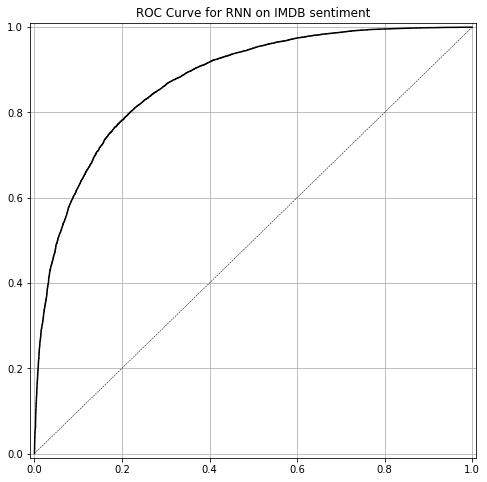

In [34]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on IMDB sentiment'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred, 'RNN')

### Excercise 
* Use sequences of length 80 rather than length of 30
* Trying different value of the 'max_features'
* Trying smaller or larger sizes of RNN hidden dimension

In [37]:
max_features = 20000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 80  # maximum length of a sequence - truncate after this

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [38]:
rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  #This layer takes each integer in the sequence
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 280       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________


In [39]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [40]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6288 - accuracy: 0.6558 - val_loss: 0.5590 - val_accuracy: 0.7278
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4767 - accuracy: 0.7812 - val_loss: 0.4609 - val_accuracy: 0.7867
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4017 - accuracy: 0.8216 - val_loss: 0.4260 - val_accuracy: 0.8050
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3592 - accuracy: 0.8461 - val_loss: 0.4030 - val_accuracy: 0.8197
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3301 - accuracy: 0.8611 - val_loss: 0.3887 - val_accuracy: 0.8264
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3082 - accuracy: 0.8715 - val_loss: 0.3934 - val_accuracy: 0.8252
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2910 - accuracy: 0.8795 - val_loss: 0.3785 - val_accuracy:

In [41]:
max_features = 5000  # This is used in loading the data, picks the most common (max_features) words
maxlen = 80  # maximum length of a sequence - truncate after this

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [42]:
rnn_hidden_dim = 5
word_embedding_dim = 20
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  #This layer takes each integer in the sequence
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 5)                 130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 100,136
Trainable params: 100,136
Non-trainable params: 0
_________________________________________________________________


In [43]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [44]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6644 - accuracy: 0.5604 - val_loss: 0.6192 - val_accuracy: 0.7070
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5905 - accuracy: 0.7448 - val_loss: 0.5857 - val_accuracy: 0.7576
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5599 - accuracy: 0.7936 - val_loss: 0.5662 - val_accuracy: 0.7884
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5384 - accuracy: 0.8094 - val_loss: 0.5577 - val_accuracy: 0.7793
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5219 - accuracy: 0.8185 - val_loss: 0.5428 - val_accuracy: 0.7978
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5076 - accuracy: 0.8250 - val_loss: 0.5335 - val_accuracy: 0.7966
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4951 - accuracy: 0.8278 - val_loss: 0.5279 - val_accuracy: 0.7953
Epoch 

In [45]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4508 - accuracy: 0.8386 - val_loss: 0.4948 - val_accuracy: 0.8013
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4403 - accuracy: 0.8437 - val_loss: 0.4839 - val_accuracy: 0.8027
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4309 - accuracy: 0.8450 - val_loss: 0.4753 - val_accuracy: 0.8042
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3870 - accuracy: 0.8391 - val_loss: 0.4405 - val_accuracy: 0.7972
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3660 - accuracy: 0.8422 - val_loss: 0.4256 - val_accuracy: 0.8008
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3545 - accuracy: 0.8496 - val_loss: 0.4168 - val_accuracy: 0.8058
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3457 - accuracy: 0.8534 - val_loss: 0.4104 - val_accuracy: 0.8136
Epoch 

In [46]:
# Out of curiosity, run for 10 more epochs
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3171 - accuracy: 0.8684 - val_loss: 0.3856 - val_accuracy: 0.8263
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3120 - accuracy: 0.8696 - val_loss: 0.3820 - val_accuracy: 0.8284
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3070 - accuracy: 0.8732 - val_loss: 0.3778 - val_accuracy: 0.8302
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3020 - accuracy: 0.8745 - val_loss: 0.3774 - val_accuracy: 0.8315
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2978 - accuracy: 0.8757 - val_loss: 0.3768 - val_accuracy: 0.8324
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2937 - accuracy: 0.8792 - val_loss: 0.3699 - val_accuracy: 0.8344
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2899 - accuracy: 0.8794 - val_loss: 0.3728 - val_accuracy: 0.8347
Epoch 